In [2]:
import numpy as np
import pandas as pd

In [3]:
data_raw = pd.read_parquet("datasets/result-1681901450873.parquet.gzip")

drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594337 entries, 0 to 1594336
Data columns (total 32 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   vin                       1594337 non-null  object 
 1   collect_ts                1594337 non-null  int64  
 2   uuid                      1594337 non-null  object 
 3   model_name                1594337 non-null  object 
 4   series_code               1594337 non-null  object 
 5   msg_create_time           1594337 non-null  object 
 6   vcu_VehicleMode           1593107 non-null  float32
 7   vcu_vehicleSpeed          1593106 non-null  float32
 8   VCU_VehicleSpeedValid     1593106 non-null  float32
 9   vcu_state                 1594033 non-null  float32
 10  bms_SOC                   1592904 non-null  float32
 11  bms_state                 1594337 non-null  float32
 12  BCM_ebs_U_BATT            185600 non-null   float32
 13  BCM_ebs_SOC               1

In [ ]:
data_raw.head(20)

In [4]:
# 填充操作
MAS00244 = data_raw[data_raw.vin == "LM8F7D89XMAS00244"].fillna(method='ffill').sort_values(by="collect_ts")
MAS00244.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38387 entries, 12401 to 468842
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       38387 non-null  object 
 1   collect_ts                38387 non-null  int64  
 2   uuid                      38387 non-null  object 
 3   model_name                38387 non-null  object 
 4   series_code               38387 non-null  object 
 5   msg_create_time           38387 non-null  object 
 6   vcu_VehicleMode           38387 non-null  float32
 7   vcu_vehicleSpeed          38387 non-null  float32
 8   VCU_VehicleSpeedValid     38387 non-null  float32
 9   vcu_state                 38387 non-null  float32
 10  bms_SOC                   38387 non-null  float32
 11  bms_state                 38387 non-null  float32
 12  BCM_ebs_U_BATT            38378 non-null  float32
 13  BCM_ebs_SOC               38378 non-null  float32
 14  BCM_eb

In [ ]:
MAS00244 = MAS00244[MAS00244["BCM_ebs_U_BATT"] > 7.]
MAS00244.info()

In [ ]:
pd.DataFrame(MAS00244["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')


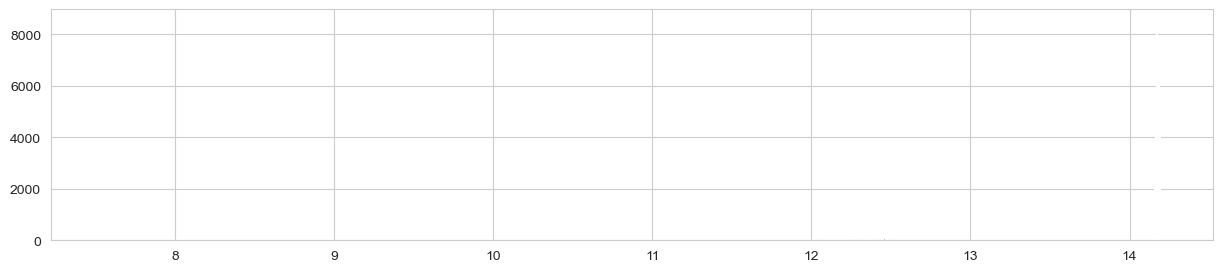

In [5]:
import matplotlib.pyplot as plt
MAS00244.BCM_ebs_U_BATT.hist(bins=1000, figsize=(15,3))
plt.show()

In [6]:
MAS00244_copy = MAS00244.copy()

MAS00244_copy['date'] = pd.to_datetime(MAS00244_copy["collect_ts"], unit='ms')

MAS00244_copy = MAS00244_copy.set_index("date")
MAS00244_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
date,,,,,,,,,,,,,,,,,,,,,
2023-04-17 04:07:50.677,LM8F7D89XMAS00244,1681704470677,LM8F7D89XMAS00244#1681704481688#2197,B24DRF8JP2L01,SERES-X1,1681704481086,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,22.0
2023-04-17 04:07:51.677,LM8F7D89XMAS00244,1681704471677,LM8F7D89XMAS00244#1681704481688#2197,B24DRF8JP2L01,SERES-X1,1681704481086,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,22.0
2023-04-17 04:07:52.677,LM8F7D89XMAS00244,1681704472677,LM8F7D89XMAS00244#1681704481688#2197,B24DRF8JP2L01,SERES-X1,1681704481086,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,22.0
2023-04-17 04:07:53.677,LM8F7D89XMAS00244,1681704473677,LM8F7D89XMAS00244#1681704481688#2197,B24DRF8JP2L01,SERES-X1,1681704481086,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,22.0
2023-04-17 04:07:54.677,LM8F7D89XMAS00244,1681704474677,LM8F7D89XMAS00244#1681704481688#2197,B24DRF8JP2L01,SERES-X1,1681704481086,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-19 10:17:05.178,LM8F7D89XMAS00244,1681899425178,LM8F7D89XMAS00244#1681899432039#1465,B24DRF8JP2L01,SERES-X1,1681899431523,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,27.0
2023-04-19 10:17:06.178,LM8F7D89XMAS00244,1681899426178,LM8F7D89XMAS00244#1681899432039#1465,B24DRF8JP2L01,SERES-X1,1681899431523,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,27.0
2023-04-19 10:17:07.178,LM8F7D89XMAS00244,1681899427178,LM8F7D89XMAS00244#1681899432039#1465,B24DRF8JP2L01,SERES-X1,1681899431523,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,27.0


In [7]:
MAS00244_copy.loc[:, ["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]]

,BCM_ebs_U_BATT,dcdc_realOutputVoltage
date,,
2023-04-17 04:07:50.677,NaN,12.0
2023-04-17 04:07:51.677,NaN,12.0
2023-04-17 04:07:52.677,NaN,12.0
2023-04-17 04:07:53.677,NaN,12.0
2023-04-17 04:07:54.677,NaN,12.0
...,...,...
2023-04-19 10:17:05.178,12.493164,12.4
2023-04-19 10:17:06.178,12.493164,12.4
2023-04-19 10:17:07.178,12.493164,12.4


In [8]:
MAS00244_copy["2023-04-17 20:50:00":"2023-04-17 21:00:00"]

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
date,,,,,,,,,,,,,,,,,,,,,
2023-04-17 20:52:50.978,LM8F7D89XMAS00244,1681764770978,LM8F7D89XMAS00244#1681764791817#216,B24DRF8JP2L01,SERES-X1,1681764791723,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0
2023-04-17 20:52:51.978,LM8F7D89XMAS00244,1681764771978,LM8F7D89XMAS00244#1681764791817#216,B24DRF8JP2L01,SERES-X1,1681764791723,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0
2023-04-17 20:52:52.978,LM8F7D89XMAS00244,1681764772978,LM8F7D89XMAS00244#1681764791817#216,B24DRF8JP2L01,SERES-X1,1681764791723,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0
2023-04-17 20:52:53.978,LM8F7D89XMAS00244,1681764773978,LM8F7D89XMAS00244#1681764791817#216,B24DRF8JP2L01,SERES-X1,1681764791723,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0
2023-04-17 20:52:54.978,LM8F7D89XMAS00244,1681764774978,LM8F7D89XMAS00244#1681764791817#216,B24DRF8JP2L01,SERES-X1,1681764791723,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17 20:57:48.703,LM8F7D89XMAS00244,1681765068703,LM8F7D89XMAS00244#1681765074408#8914,B24DRF8JP2L01,SERES-X1,1681765073835,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0
2023-04-17 20:57:49.703,LM8F7D89XMAS00244,1681765069703,LM8F7D89XMAS00244#1681765074408#8914,B24DRF8JP2L01,SERES-X1,1681765073835,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0
2023-04-17 20:57:50.703,LM8F7D89XMAS00244,1681765070703,LM8F7D89XMAS00244#1681765074408#8914,B24DRF8JP2L01,SERES-X1,1681765073835,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,25.0


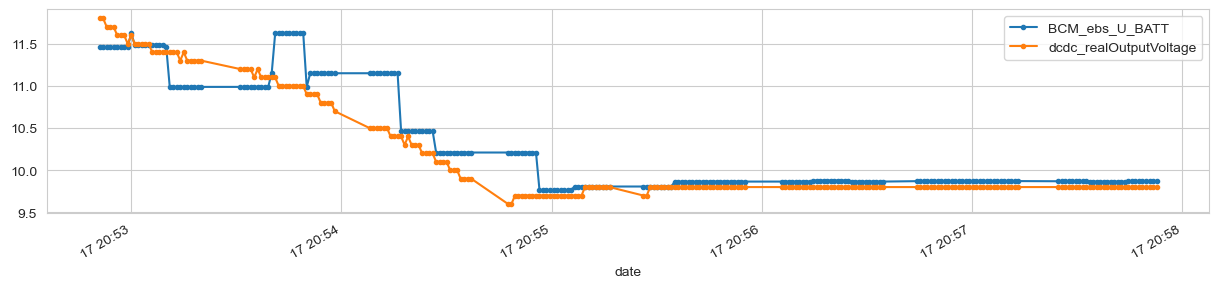

In [9]:
import matplotlib.pyplot as plt

MAS00244_copy["2023-04-17 20:50:00":"2023-04-17 21:00:00"][["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

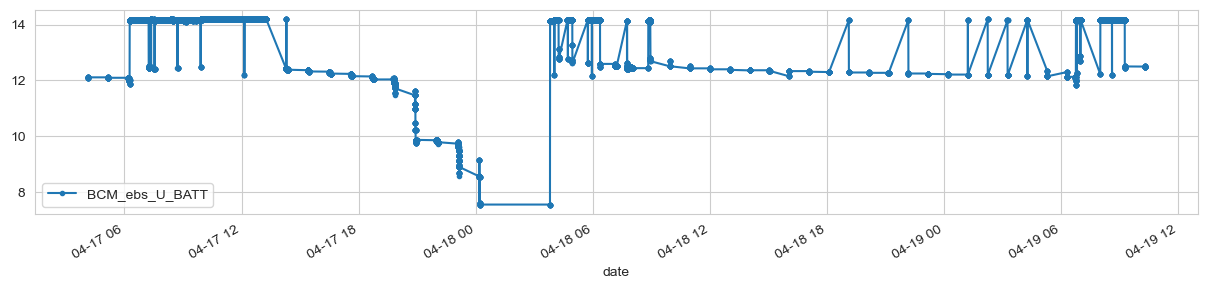

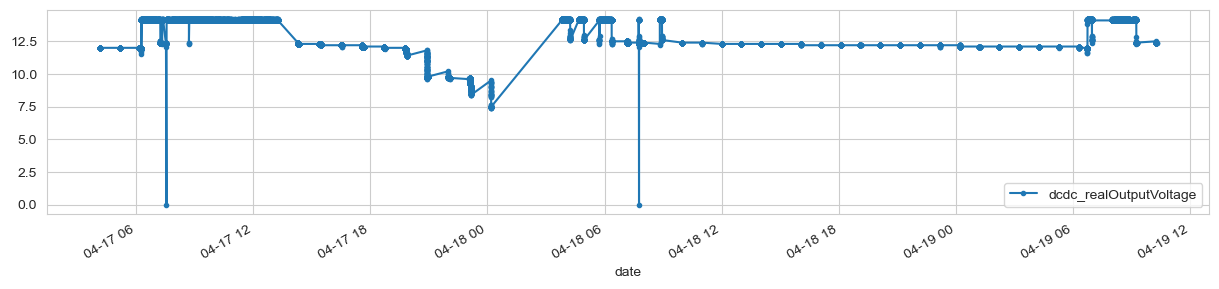

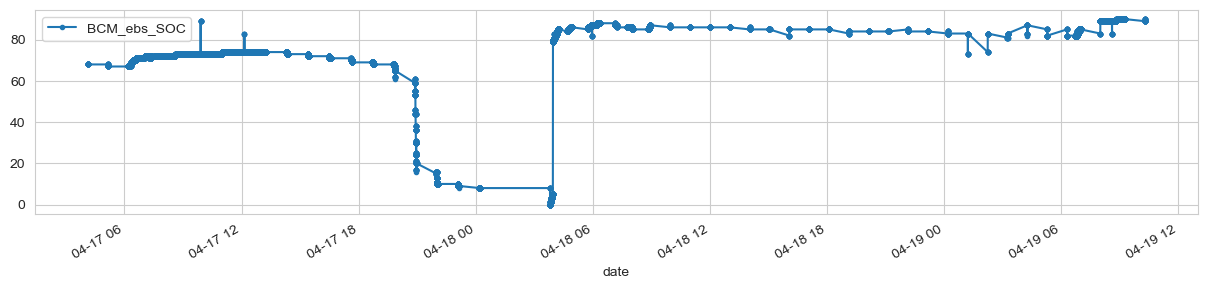

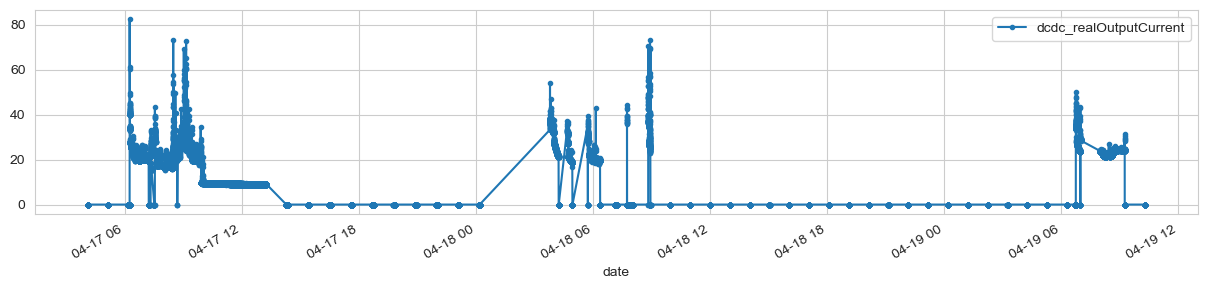

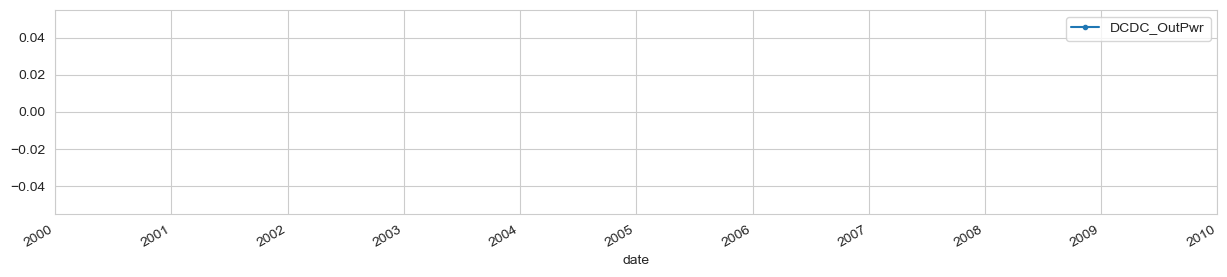

In [10]:
import matplotlib.pyplot as plt

MAS00244_copy[["BCM_ebs_U_BATT"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00244_copy[["dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00244_copy[["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00244_copy[["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
MAS00244_copy[["DCDC_OutPwr"]].plot(grid=True, marker=".", figsize=(15, 3))
# extra code – saves the figure for the book
plt.show()

In [ ]:
MAS00244_copy[["BCM_ebs_U_BATT"]].plot(grid=True, marker=".", figsize=(15, 3))

#MAS00244_copy[["DCDC_realInputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

#MAS00244_copy[["DCDC_realInputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00244_copy[["DCDC_OutPwr"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00244_copy[["vcu_dcdc_enable"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00244_copy[["vcu_dcdc_voltageReq"]].plot(grid=True, marker=".", figsize=(15, 3))
